<a href="https://colab.research.google.com/github/HimanshuSahoo/Python-for-Data-Scientist/blob/main/Mail_Classification_Himanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('emails1')

In [ ]:
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [ ]:
df.sample(5)

,Unnamed: 0,filename,Message-ID,content,Class
33010,33010,beck-s/murphy__ted/5.,<14050732.1075855881946.JavaMail.evans@thyme>,We have created four additional graphs to be p...,Non Abusive
32517,32517,beck-s/inbox/491.,<3947306.1075858751945.JavaMail.evans@thyme>,\n \nHere are the basic elements of the hub c...,Non Abusive
46094,46094,campbell-l/discussion_threads/526.,<31925414.1075851907593.JavaMail.evans@thyme>,"Just to keep all permit information together, ...",Non Abusive
24163,24163,beck-s/_sent_mail/418.,<31646686.1075855922225.JavaMail.evans@thyme>,I left a voice mail message for Dave Delainey ...,Non Abusive
35884,35884,benson-r/discussion_threads/63.,<28970769.1075855755018.JavaMail.evans@thyme>,Fundamentals of Corporate Finance - May 24 & 2...,Non Abusive


In [ ]:
df.shape

(48076, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
# drop first 3 cols
df.drop(columns=['Unnamed: 0','filename','Message-ID'],inplace=True)

In [ ]:
df.sample(5)

,content,Class
53,pussy\n\n\n Hector Campos 01/...,Abusive
23764,Thanks for letting me know. I am sure that yo...,Non Abusive
17527,---------------------- Forwarded by Eric Bass/...,Non Abusive
32580,"\nAs you are all aware, the latest Risk Manage...",Non Abusive
24680,"In my new role as social secretary for James, ...",Non Abusive


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,content,Class
18352,[IMAGE]\n\n\nFantasy Basketball is here...and ...,Non Abusive
12958,"\nSara,\n\nAs in our past exercises for the ""N...",Non Abusive
34919,I can not attend as I will be in the London of...,Non Abusive
3235,"Kerry,\n\nI have decided I am going home for T...",Abusive
44736,Scott--\n\nWould you please include my name on...,Non Abusive


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Class'] = encoder.fit_transform(df['Class'])

In [ ]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [ ]:
# missing values
df.isnull().sum()

content    0
Class      0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

23420

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(24656, 2)

## EDA

In [ ]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [ ]:
df['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

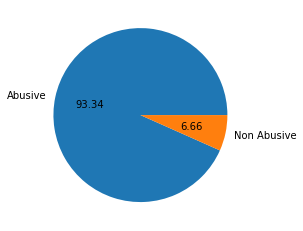

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['Abusive','Non Abusive'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['num_characters'] = df['content'].apply(len)

In [ ]:
df.head()

,content,Class,num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [ ]:
# num of words
df['num_words'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,content,Class,num_characters,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [ ]:
df['num_sentences'] = df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,content,Class,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.351882,12.570409
std,5394.644531,818.222258,26.921471
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [ ]:
# Non Abusive
df[df['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.697929,16.955542
std,2834.633786,590.602864,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [ ]:
#Abusive
df[df['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.184496,12.257539
std,5532.160062,832.095511,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

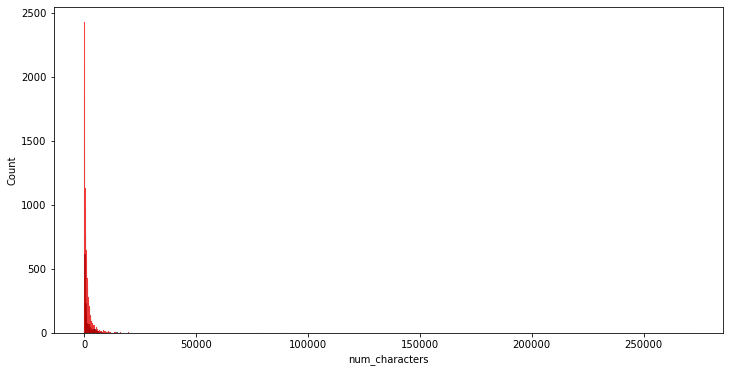

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_characters'])
sns.histplot(df[df['Class'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

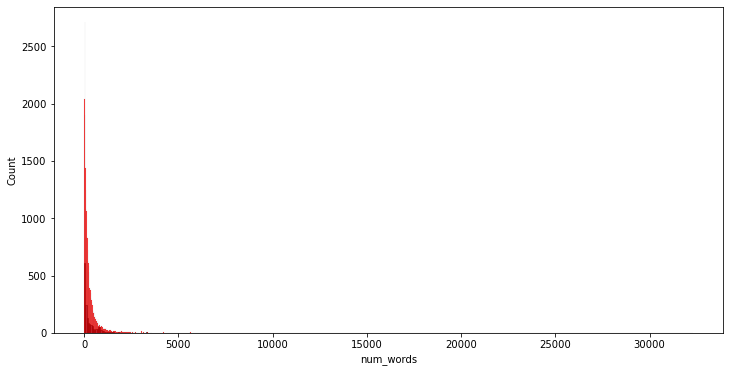

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_words'])
sns.histplot(df[df['Class'] == 1]['num_words'],color='red')

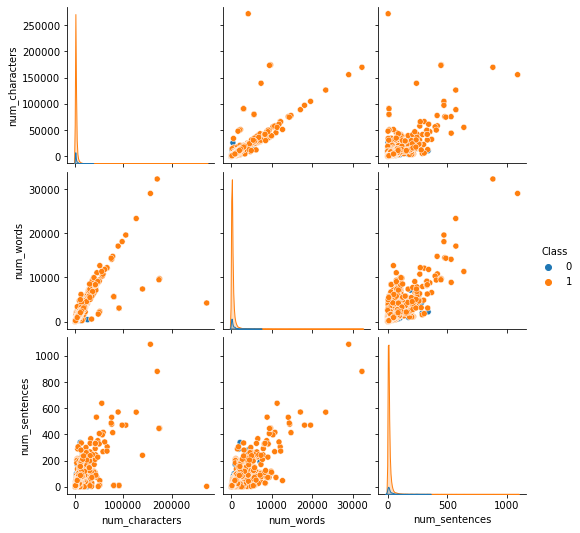

In [ ]:
sns.pairplot(df,hue='Class')

<AxesSubplot:>

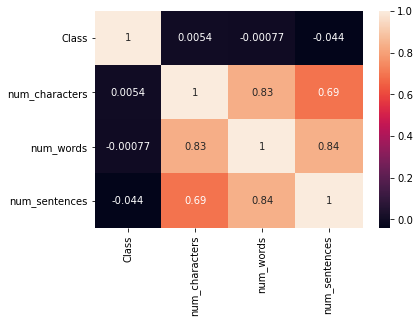

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing
. Lower case

. Tokenization

. Removing special characters

. Removing stop words and punctuation

. Stemming

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(content):
    content = content.lower()
    content = nltk.word_tokenize(content)
    
    y = []
    for i in content:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in content:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"i 'm gon na be home soon and i do n't want to talk about thi stuff anymor tonight , k ? i 've cri enough today ."

In [ ]:
df['content'][5]

'asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24/2000 08:45 AM\nTo: John Arnold/HOU/ECT@ECT\ncc:  \nSubject: \n\nrams -3.5\nwash -7\nraiders -9 1/2\nbalt -5\nbears lions over 37\neagles bengals under 35 1/2\npats +4\nvikings +5.5\n\n\n'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['content'].apply(transform_text)

In [ ]:
df.head()

,content,Class,num_characters,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato @ excelr 11/18/2000 0...
1,fuck you,0,8,2,1,fuck you
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen : the follow champagn is avail at 70...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri i 've taken so long ... just been tri to...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato @ excelr 12/23/2000 10:...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
Abusive_wc = wc.generate(df[df['Class'] == 1]['transformed_text'].str.cat(sep=" "))

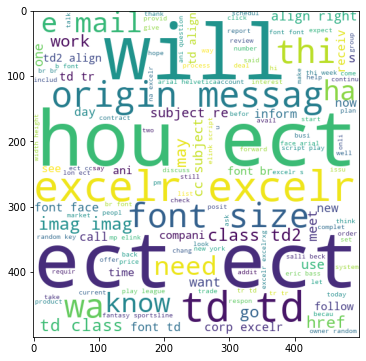

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(Abusive_wc)

In [ ]:
NonAbusive_wc = wc.generate(df[df['Class'] == 0]['transformed_text'].str.cat(sep=" "))

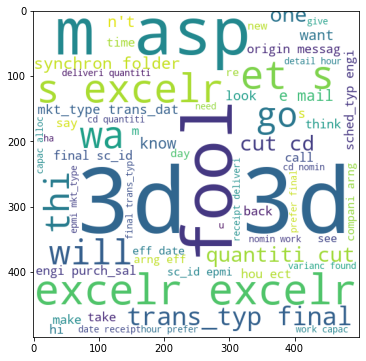

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(NonAbusive_wc)

In [ ]:
df.head()

,content,Class,num_characters,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato @ excelr 11/18/2000 0...
1,fuck you,0,8,2,1,fuck you
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen : the follow champagn is avail at 70...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri i 've taken so long ... just been tri to...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato @ excelr 12/23/2000 10:...


In [ ]:
Abusive_corpus = []
for msg in df[df['Class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        Abusive_corpus.append(word)

In [ ]:
len(Abusive_corpus)

7815231

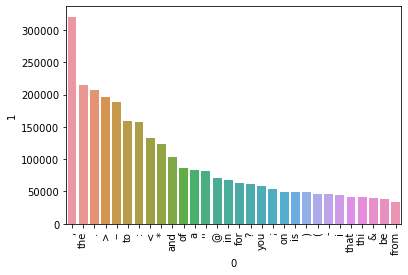

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(Abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
NonAbusive_corpus = []
for msg in df[df['Class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        NonAbusive_corpus.append(word)

In [ ]:
len(NonAbusive_corpus)

561252

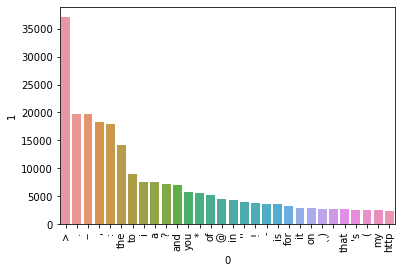

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[0],pd.DataFrame(Counter(NonAbusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,content,Class,num_characters,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato @ excelr 11/18/2000 0...
1,fuck you,0,8,2,1,fuck you
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen : the follow champagn is avail at 70...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri i 've taken so long ... just been tri to...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato @ excelr 12/23/2000 10:...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(24656, 3000)

In [ ]:
y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8258313057583131
[[ 264   66]
 [ 793 3809]]
0.9829677419354839


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9582319545823196
[[ 154  176]
 [  30 4572]]
0.9629317607413648


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8236009732360098
[[ 287   43]
 [ 827 3775]]
0.9887375589313777


In [ ]:
# tfidf --> MNB

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9750608272506083, 0.9778109665030936)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9750608272506083
Precision -  0.9778109665030936
For  KN
Accuracy -  0.9480940794809408
Precision -  0.9521431543903454
For  NB
Accuracy -  0.9582319545823196
Precision -  0.9629317607413648
For  DT
Accuracy -  0.9503244120032441
Precision -  0.9537596334097063
For  LR
Accuracy -  0.9766828872668288
Precision -  0.9780524184956317
For  RF
Accuracy -  0.9716139497161395
Precision -  0.970873786407767
For  AdaBoost
Accuracy -  0.9641119221411192
Precision -  0.9694462126034373
For  BgC
Accuracy -  0.9720194647201946
Precision -  0.9808272296423955
For  ETC
Accuracy -  0.9695863746958637
Precision -  0.9698184888138455
For  GBDT
Accuracy -  0.9651257096512571
Precision -  0.9649454240134341
[08:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.972019,0.980827
4,LR,0.976683,0.978052
0,SVC,0.975061,0.977811
10,xgb,0.973236,0.973517
5,RF,0.971614,0.970874
8,ETC,0.969586,0.969818
6,AdaBoost,0.964112,0.969446
9,GBDT,0.965126,0.964945
2,NB,0.958232,0.962932
3,DT,0.950324,0.953760


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,BgC,Accuracy,0.972019
1,LR,Accuracy,0.976683
2,SVC,Accuracy,0.975061
3,xgb,Accuracy,0.973236
4,RF,Accuracy,0.971614
5,ETC,Accuracy,0.969586
6,AdaBoost,Accuracy,0.964112
7,GBDT,Accuracy,0.965126
8,NB,Accuracy,0.958232
9,DT,Accuracy,0.950324


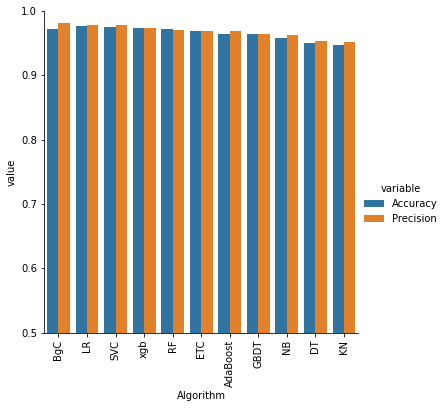

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,BgC,0.972019,0.980827,0.972019,0.980827,0.972019,0.980827,0.972019,0.980827
1,LR,0.976683,0.978052,0.976683,0.978052,0.976683,0.978052,0.976683,0.978052
2,SVC,0.975061,0.977811,0.975061,0.977811,0.975061,0.977811,0.975061,0.977811
3,xgb,0.973236,0.973517,0.973236,0.973517,0.973236,0.973517,0.973236,0.973517
4,RF,0.971614,0.970874,0.971614,0.970874,0.971614,0.970874,0.971614,0.970874
5,ETC,0.969586,0.969818,0.969586,0.969818,0.969586,0.969818,0.969586,0.969818
6,AdaBoost,0.964112,0.969446,0.964112,0.969446,0.964112,0.969446,0.964112,0.969446
7,GBDT,0.965126,0.964945,0.965126,0.964945,0.965126,0.964945,0.965126,0.964945
8,NB,0.958232,0.962932,0.958232,0.962932,0.958232,0.962932,0.958232,0.962932
9,DT,0.950324,0.953760,0.950324,0.953760,0.950324,0.953760,0.950324,0.953760


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758718572587186
Precision 0.9772195018096658


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9778994322789943
Precision 0.9846817691477886


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))